#Tratamento dos áudios gravados para o dataset

Gravei tapas e polegares em áudios que devo segmentar para separar em notas individuais para serem usadas para treinamento



###Checklist

1. ~~tapas longos~~ -- SuperFluxExtractor com combine=100, ratioThreshold=10, threshold=default
1. ~~tapas médios~~ -- SuperFluxExtractor com combine=100, ratioThreshold=10, threshold=default
1. ~~tapas curtos~~ -- SuperFluxExtractor com combine=100, ratioThreshold=10, threshold=default
1. ~~tapas curtíssimos~~ -- SuperFluxExtractor com combine=100, ratioThreshold=10, threshold=default
1. ~~polegares longos~~ -- SuperFluxExtractor com combine=100, ratioThreshold=13, threshold=default
1. ~~polegares médios~~ -- SuperFluxExtractor com combine=100, ratioThreshold=10, threshold=default
1. ~~polegares curtos~~ -- SuperFluxExtractor com combine=100, ratioThreshold=8.5, threshold=default
1. ~~polegares curtíssimos~~ -- SuperFluxExtractor com combine=100, ratioThreshold=7.7, threshold=default



In [ ]:
PATH_MODULES = "../prototipos/"
exec(open(PATH_MODULES+"setup.py").read())
PATH_AUDIOS = PATH_AUDIO+"dataset/audios/nao-tratados/"
AUDIO_FILES = ["15_tapas_rapido.m4a", "15_tapas_medio.m4a",
               "15_tapas_lento.m4a", "15_tapas_extra_rapido.m4a",
               "15_graves_rapido.m4a", "15_graves_medio.m4a",
               "15_graves_lento.m4a", "15_graves_extra_rapido.m4a"]
exec(open(PATH_MODULES+"audiosegmentation.py").read())

In [ ]:
audios = load_audio_from_project(audios_path=PATH_AUDIOS)

['15_graves_rapido.m4a', '15_tapas_lento.m4a', '15_graves_medio.m4a', '15_tapas_extra_rapido.m4a', '15_graves_extra_rapido.m4a', '15_tapas_rapido.m4a', '15_graves_lento.m4a', '15_tapas_medio.m4a']


In [ ]:
print(audios.keys())

dict_keys(['15_graves_rapido.m4a', '15_tapas_lento.m4a', '15_graves_medio.m4a', '15_tapas_extra_rapido.m4a', '15_graves_extra_rapido.m4a', '15_tapas_rapido.m4a', '15_graves_lento.m4a', '15_tapas_medio.m4a'])


In [ ]:
#segments, onsets = SuperFluxSegmentation(audios["15_graves_extra_rapido.m4a"]["data"][:200000],
#                                         combine=100,
#                                         ratioThreshold=7.7,
#                                         threshold=0.05)

segments, onsets = OnsetsSegmentation(audio=audios["15_graves_extra_rapido.m4a"]["data"][:178000],
                                      frame_size=512,
                                      frame_hop=216,
                                      windowing_type='square',
                                      onsets_method='hfc')

In [ ]:
len(segments)

17

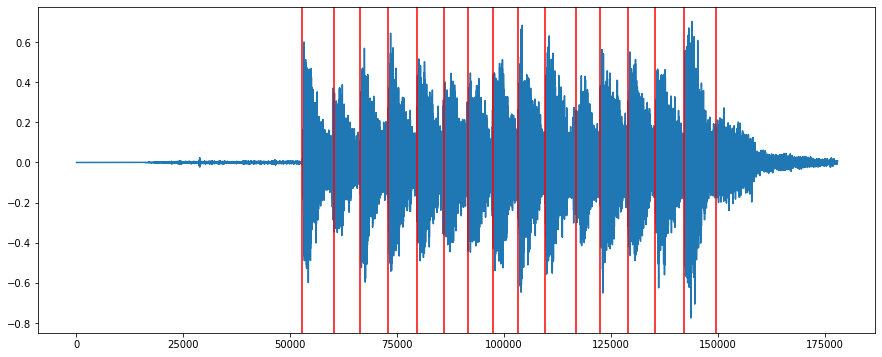

In [ ]:
def aux_plot():
  for onset in onsets:
    plt.axvline(x=onset*44100, color='red')

see_audio(audios["15_graves_extra_rapido.m4a"]["data"][:178000], aux_plot)

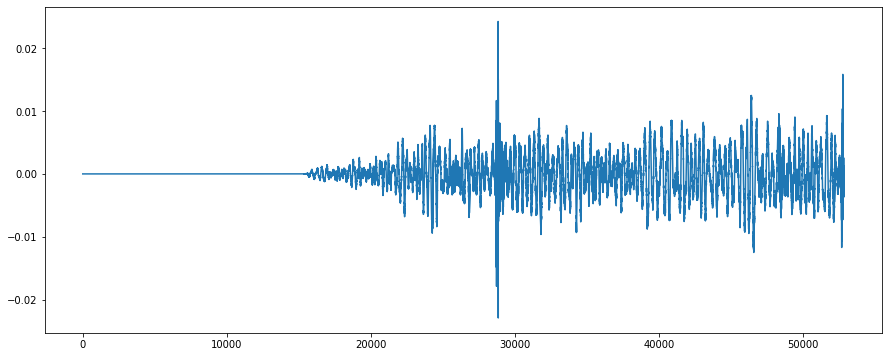

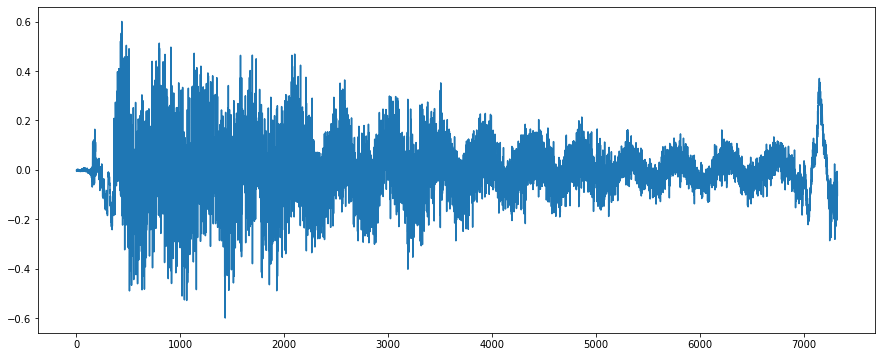

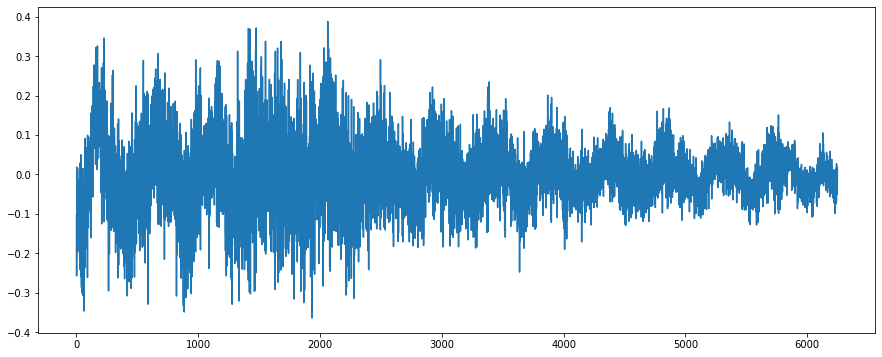

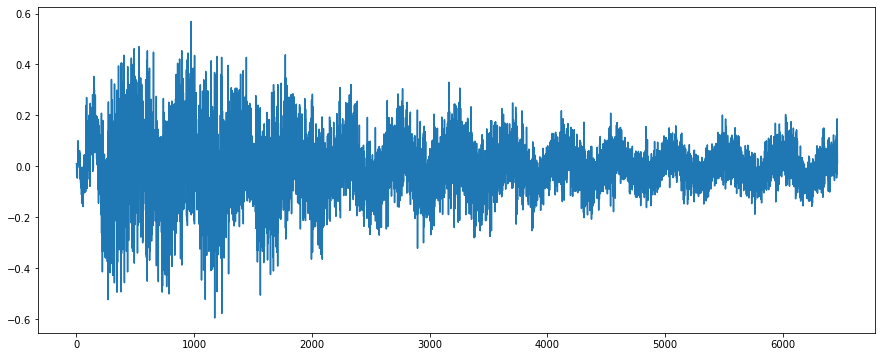

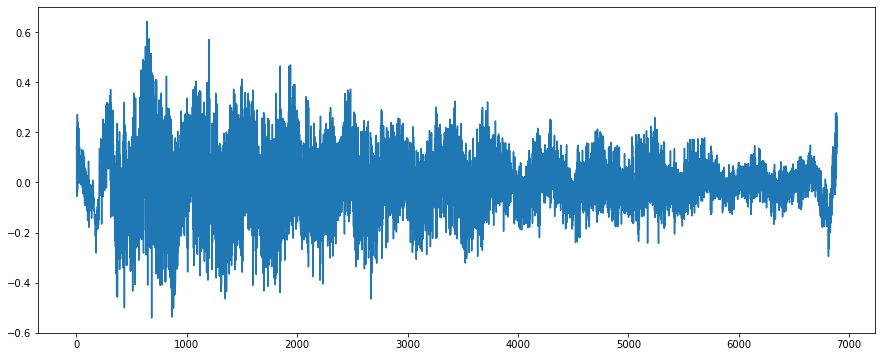

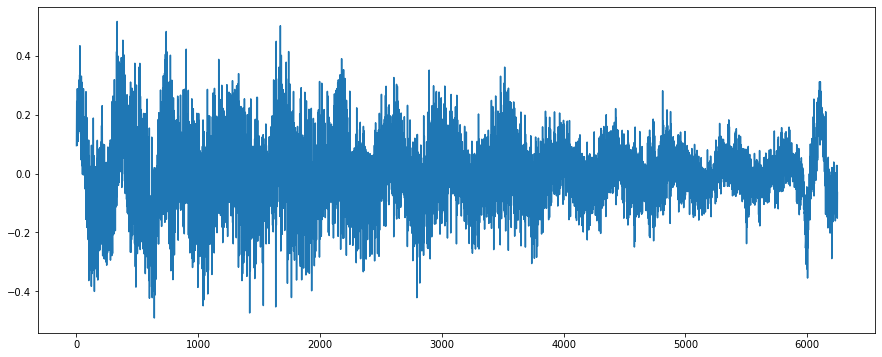

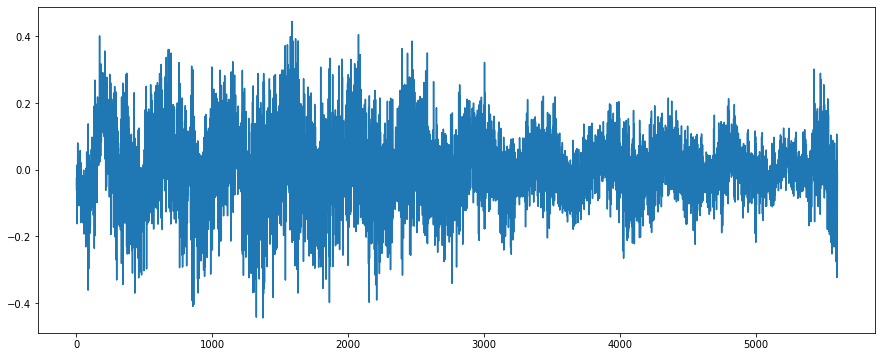

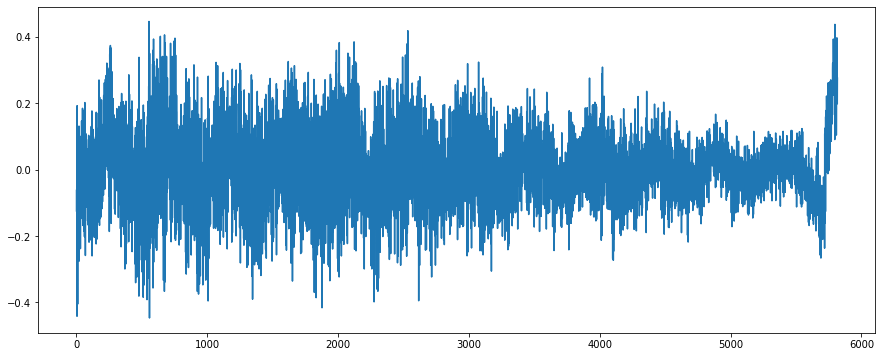

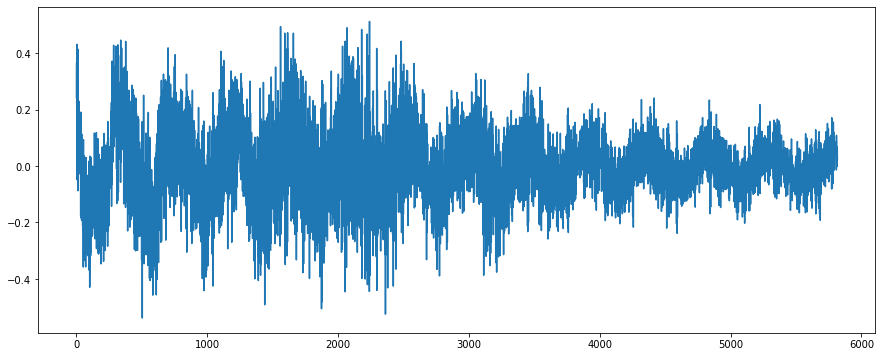

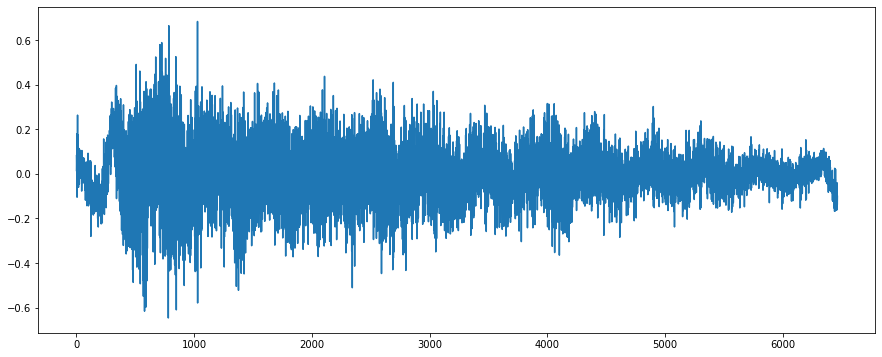

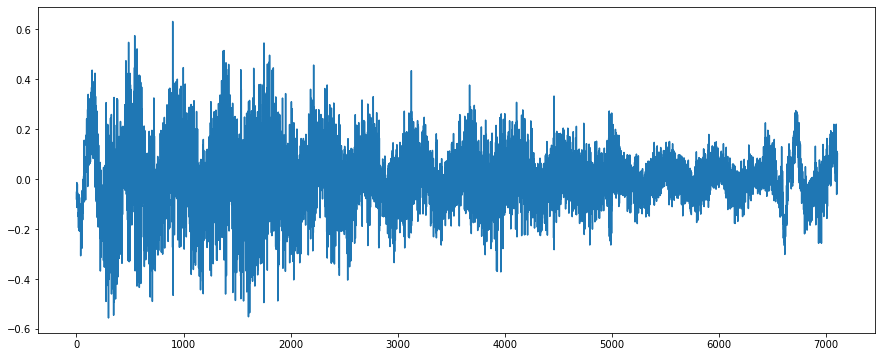

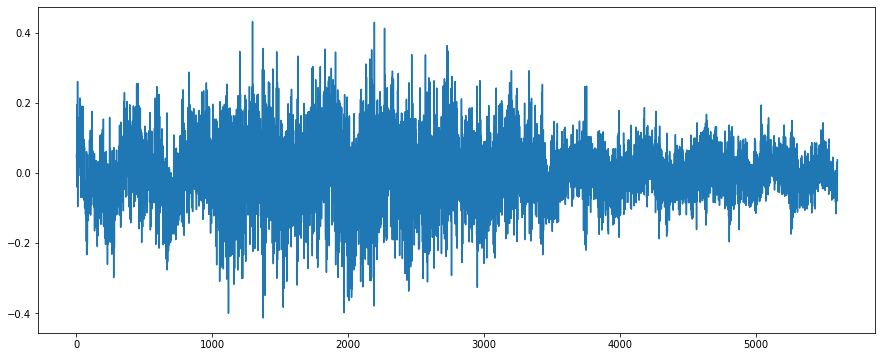

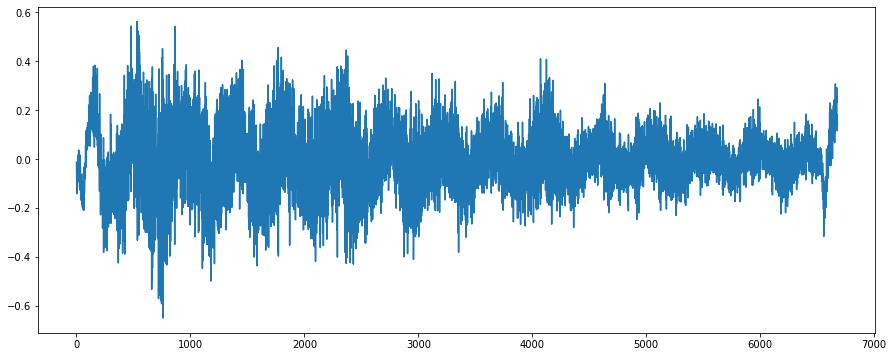

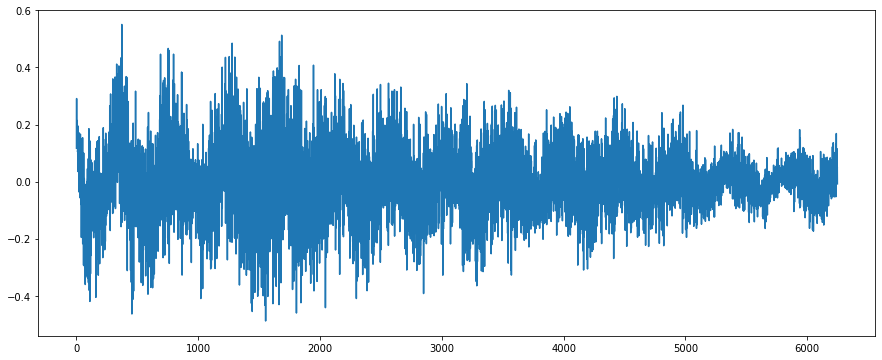

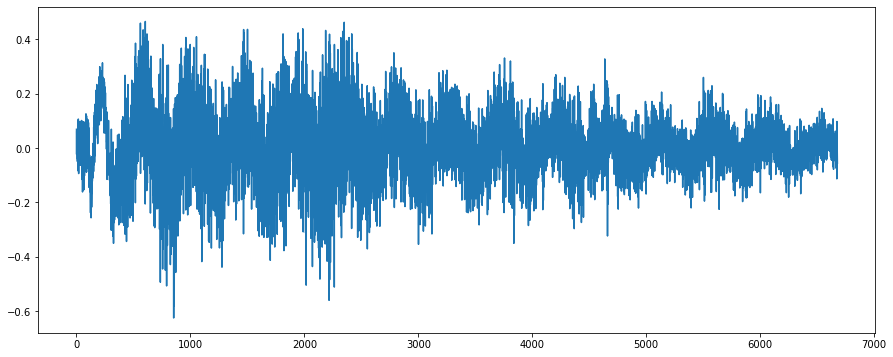

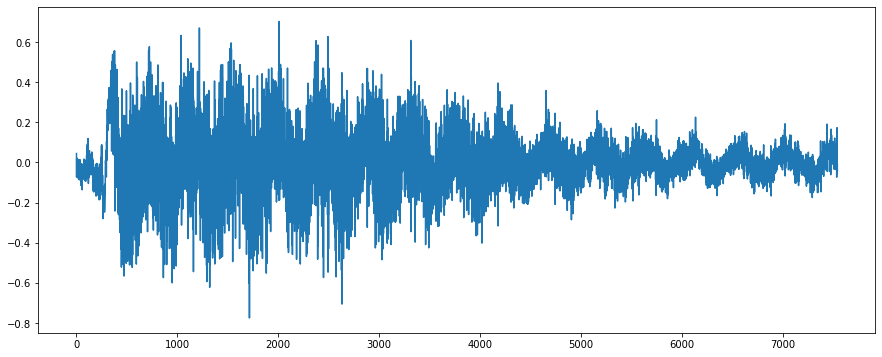

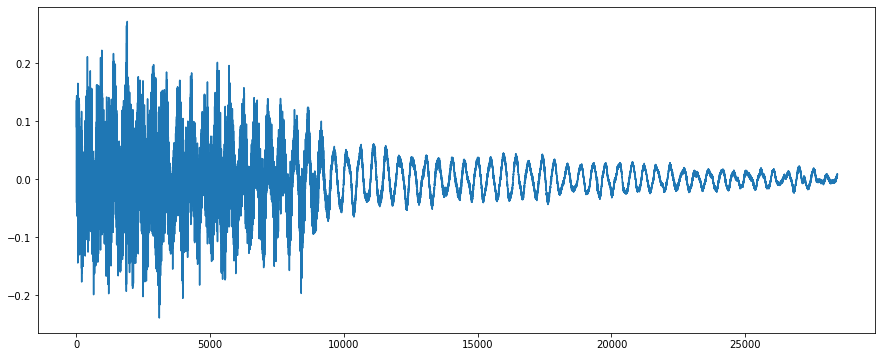

In [ ]:
for seg in segments:
  see_audio(seg)

In [ ]:
seg_validos = segments[2:-1]

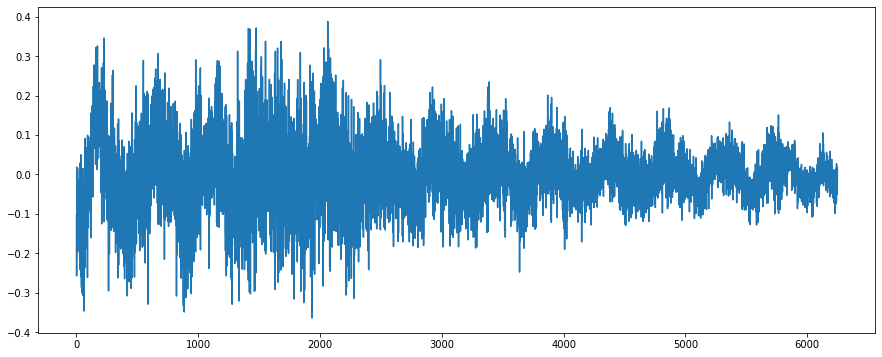

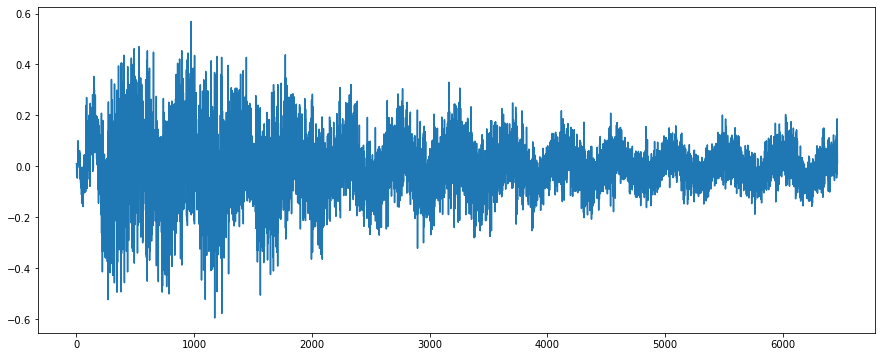

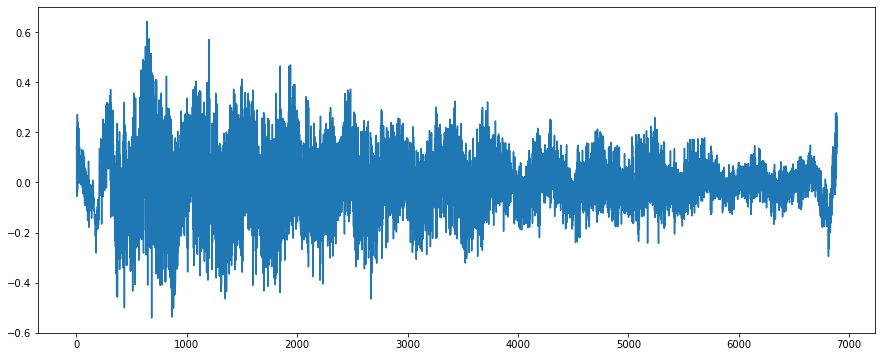

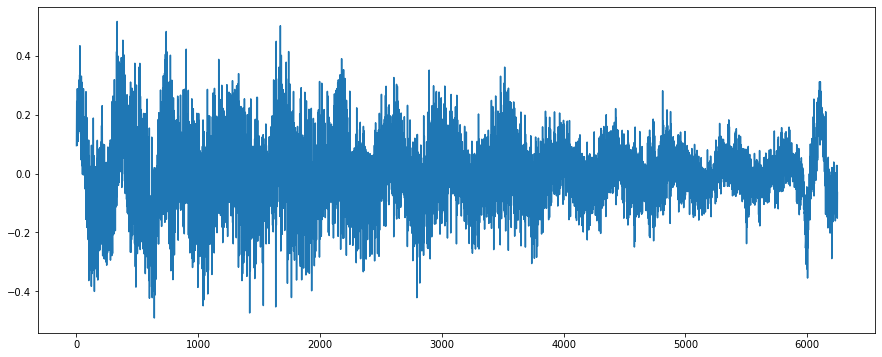

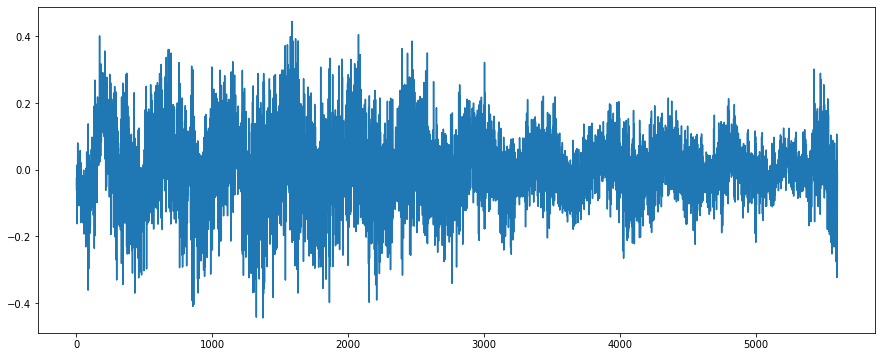

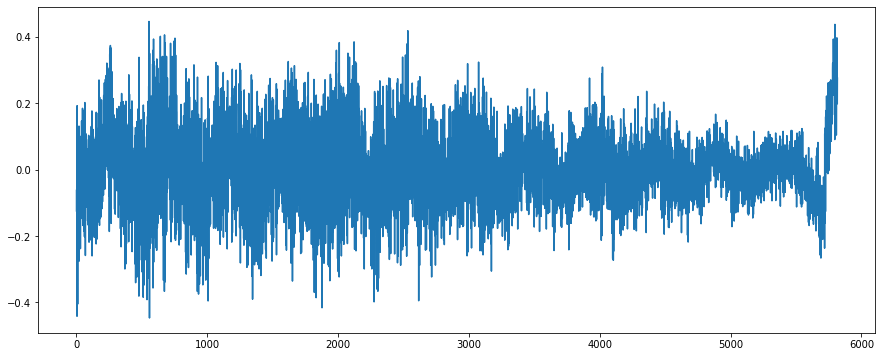

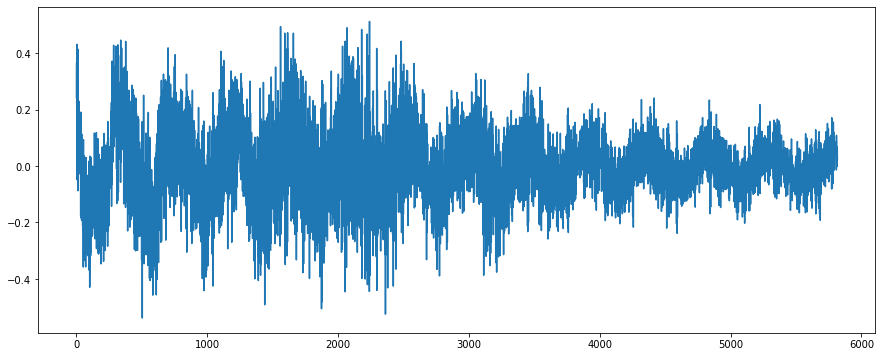

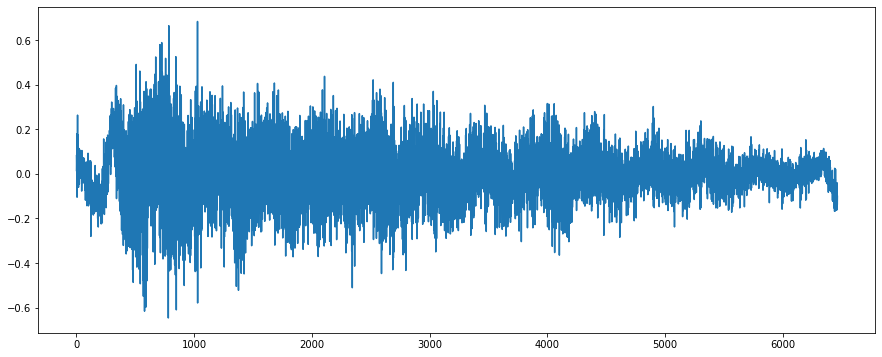

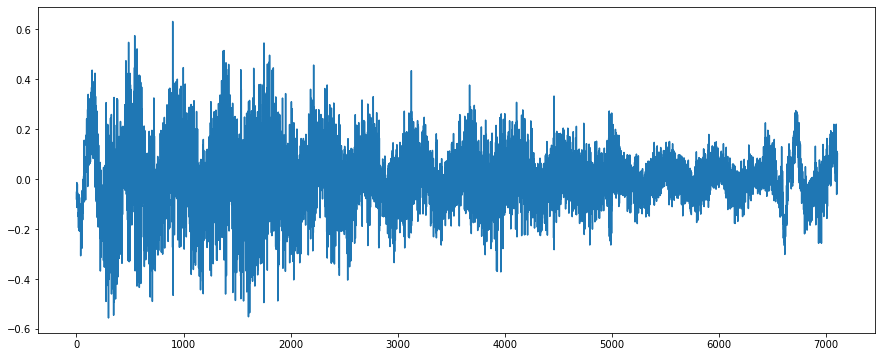

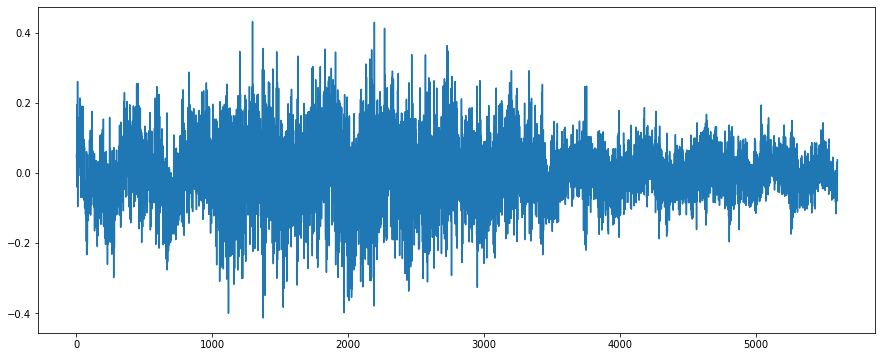

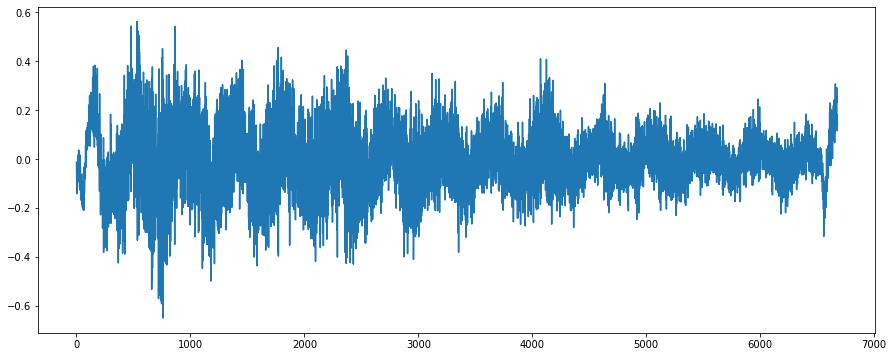

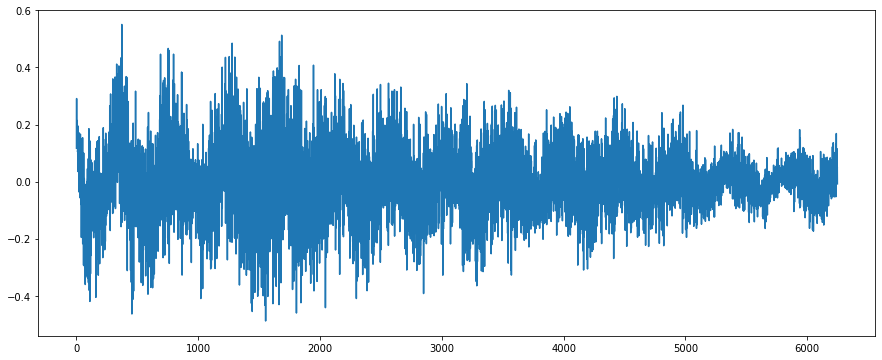

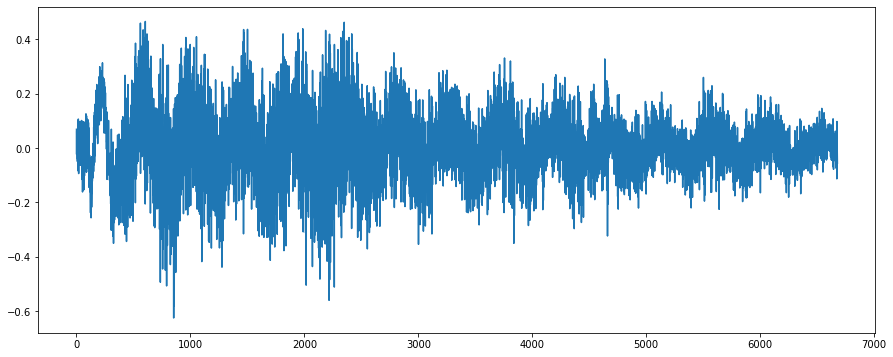

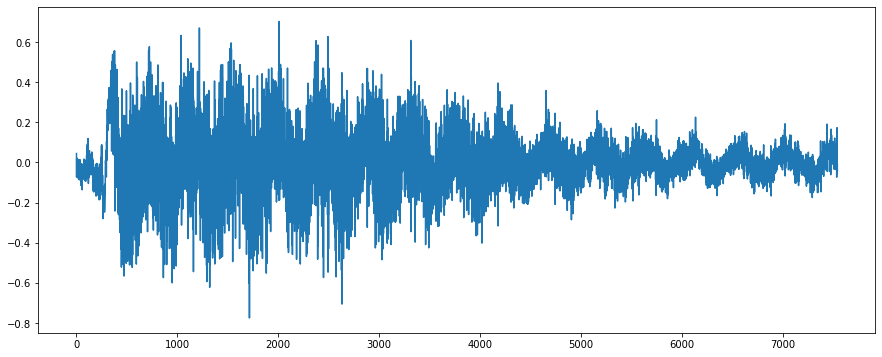

In [ ]:
for seg in seg_validos:
  see_audio(seg)

In [ ]:
len(seg_validos)

14

In [ ]:
#def save_audios_to_dataset(validos=None, dataset_file=None, file_name=None):
#  assert validos
#  assert dataset_file
#  assert file_name
#  i=0
#  path="/content/mydrive/My Drive/Rodrigo/PUC/Pesquisa Final/Áudio /Gravações do microfone/dataset/"+dataset_file
#  for seg in seg_validos:
#    es_mode.MonoWriter(filename=path+file_name+"_"+str(i)+'.wav', format='wav')(seg)
#    i+=1

In [ ]:
#save_audios_to_dataset(seg_validos, "polegares/", "polegar_extra_curto")